In [1]:
#operating system 
import os

import numpy as np
import pandas as pd

#to handle json files
import json

from geopy.extra.rate_limiter import RateLimiter
import time


# convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

#--Web scraping packages
from bs4 import BeautifulSoup
# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

 #import folium for map rendering 
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Get Ethnic Groups Data by Borough 

Excel from from https://data.london.gov.uk/dataset/ethnic-groups-borough which contains the ethnic  groups data numbers in every London's Boroughs till 2018 

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
london_table_ethnic=df_data_0[["Area","White","Asian","Black","Mixed/ Other"]]
london_table_ethnic=london_table_ethnic[1:].reset_index(drop=True)
london_table_ethnic=london_table_ethnic.replace(to_replace="-" , value=4000)
london_table_ethnic

,Area,White,Asian,Black,Mixed/ Other
0,Barking and Dagenham,109000.0,54000.0,36000,15000.0
1,Barnet,250000.0,57000.0,30000,54000.0
2,Bexley,195000.0,17000.0,21000,15000.0
3,Brent,102000.0,107000.0,62000,56000.0
4,Bromley,267000.0,15000.0,21000,28000.0
5,Camden,158000.0,39000.0,19000,38000.0
6,Croydon,227000.0,70000.0,64000,24000.0
7,Ealing,174000.0,96000.0,23000,50000.0
8,Enfield,206000.0,37000.0,74000,20000.0
9,Greenwich,178000.0,39000.0,48000,19000.0


## Scrape London Boroughs Data from Wikipedia page 


In [4]:
url="https://en.wikipedia.org/wiki/List_of_London_boroughs"


#Create a handle, page, to handle the contents of the website
page=requests.get(url).text
soup=BeautifulSoup(page,"html.parser")
table=soup.find("table",{"class":"wikitable sortable"})

pd.options.mode.chained_assignment = None  # default='warn'
london_table=pd.read_html(str(table))[0]    
london_table_Borough=london_table[["Borough","Co-ordinates"]]
london_table_Borough.iloc[0,0]="Barking and Dagenham"
london_table_Borough.iloc[9,0]="Greenwich"
london_table_Borough.iloc[11,0]="Hammersmith and Fulham"
london_table_Borough.reset_index()
london_table_Borough

,Borough,Co-ordinates
0,Barking and Dagenham,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


In [5]:
asian_london_table=london_table_ethnic[["Area","Asian"]]
asian_london_table

,Area,Asian
0,Barking and Dagenham,54000.0
1,Barnet,57000.0
2,Bexley,17000.0
3,Brent,107000.0
4,Bromley,15000.0
5,Camden,39000.0
6,Croydon,70000.0
7,Ealing,96000.0
8,Enfield,37000.0
9,Greenwich,39000.0


In [6]:
import matplotlib.pyplot as plt
areas=asian_london_table['Area']
asians=asian_london_table['Asian']


plt.figure(figsize=(10,10)) 
plt.barh(areas,asians)

<BarContainer object of 32 artists>

# Get Earnings per hour Data by Borough
Excel from from https://data.london.gov.uk/dataset/ which contains the earnings per hour data in every London's Boroughs till 2019

In [7]:

body = client_761f5eae420b46bfa5ca4e431d9ba75b.get_object(Bucket='datasciencecourseracapstone-donotdelete-pr-jh7wpfejmixohs',Key='Earnings.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_excel(body)



In [8]:
london_table_earning=df_data_1
london_table_earning=london_table_earning[1:].reset_index(drop=True)
london_table_earning.head()

,Area,2019
0,Barking and Dagenham,15.09
1,Barnet,17.73
2,Bexley,16.97
3,Brent,15.67
4,Bromley,20.9


<BarContainer object of 32 artists>

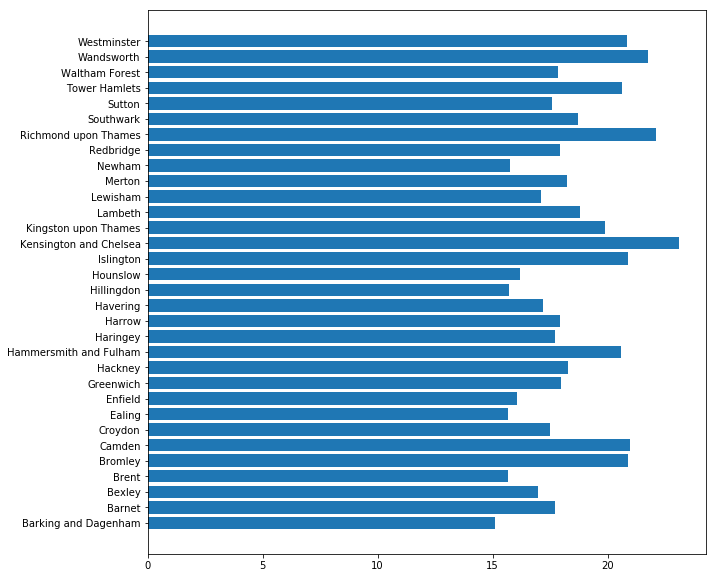

In [9]:
area_earnings=london_table_earning['Area']
earnings=london_table_earning[2019]

plt.figure(figsize=(10,10))
plt.barh(area_earnings,earnings)


# Get Working hours by Borough
Excel from https://data.london.gov.uk/dataset/ which contains the working hours data in every London's Boroughs, The data is divided into categories of hours , We will work only with the category of % of all in employment who work 35-44 hours as it is the heighest percantage of all categories 

In [10]:

body = client_761f5eae420b46bfa5ca4e431d9ba75b.get_object(Bucket='datasciencecourseracapstone-donotdelete-pr-jh7wpfejmixohs',Key='Working Hours.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_excel(body)
df_data_2.head()

,Unnamed: 0,% of all in employment who work 35-44 hours,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Area,number,In employment,percent,confidence
1,NaN,NaN,NaN,NaN,NaN
2,City of London,38500,77500,49.7,5.2
3,Barking and Dagenham,73100,174000,42,5.2
4,Barnet,51000,105900,48.1,5.5


In [11]:
london_working_hours=df_data_2[['Unnamed: 0','Unnamed: 3']]
london_working_hours.columns=["Boroughs","Working Hours%"]
london_working_hours=london_working_hours[3:].reset_index(drop=True)
london_working_hours['Working Hours%'][5]=42.43
london_working_hours.head()

,Boroughs,Working Hours%
0,Barking and Dagenham,42
1,Barnet,48.1
2,Bexley,47.2
3,Brent,45.8
4,Bromley,36.5


<BarContainer object of 32 artists>

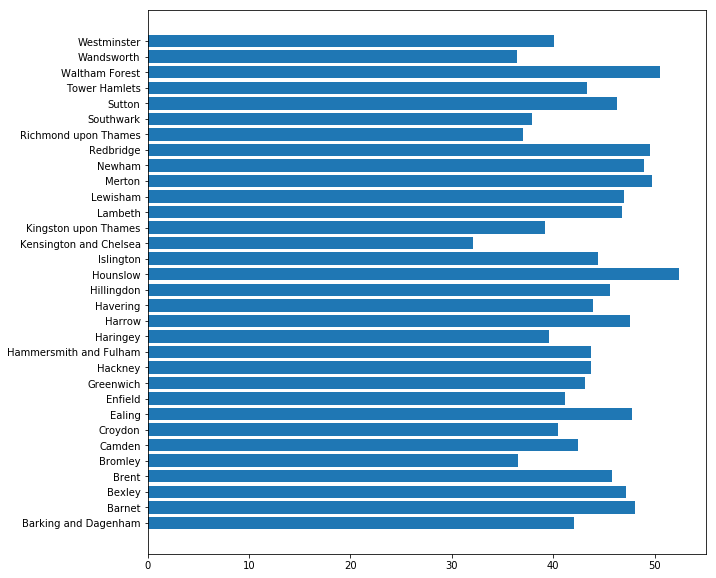

In [12]:
boroughs=london_working_hours['Boroughs']
hours=london_working_hours['Working Hours%']

plt.figure(figsize=(10,10))

plt.barh(boroughs,hours)

# Top Three earning per hour , Working hours and Asian population

In [13]:
most_working_borough = london_working_hours.sort_values(by='Working Hours%', ascending=False).Boroughs.tolist()
population = asian_london_table.sort_values(by='Asian', ascending=False).Area.tolist()
earning = london_table_earning.sort_values(by=2019, ascending=False).Area.tolist()

print("Top three earning per hour population boroughs:" , earning[0] , "," , earning[1] , "and" ,earning[3])
print("Top three Working hours boroughs:" ,most_working_borough[0] , "," , most_working_borough[1] , "and" ,most_working_borough[3])
print("Top three Asian population boroughs:" , population[0] , "," ,  population[1] , "and" ,  population[2])
Borough = ""
index=None
for a in most_working_borough[0:4]:
        for b in population[0:4]:                
                if a == b:
                    Borough= b

print("The highest borough in working hours and asian population:" ,  Borough )


Top three earning per hour population boroughs: Kensington and Chelsea , Richmond upon Thames and Camden
Top three Working hours boroughs: Hounslow , Waltham Forest and Redbridge
Top three Asian population boroughs: Newham , Tower Hamlets and Redbridge
The highest borough in working hours and asian population: Redbridge


# using Geopy to get all the Longtitude and Latitude for London Boroughs



In [17]:
london_table=london_table_Borough.copy()
latitude=[]
longitude=[]
for i in range(len(london_table)):
    borough=(london_table['Borough'][i])
    geolocator=Nominatim(user_agent='my-app-location')
    geocode = RateLimiter(geolocator.geocode,min_delay_seconds=1)
    location = geolocator.geocode(borough)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    time.sleep(1.1)

print('Done!')
london_table['latitude']=latitude
london_table['longitude']=longitude

Done!


In [18]:
pd.options.mode.chained_assignment = None  # default='warn'
london_table_coordinates=london_table.drop('Co-ordinates',1)
london_table_coordinates['longitude'][28]=0.0293
london_table_coordinates['latitude'][28]=51.5203
london_table_coordinates['longitude'][20]=0.1178
london_table_coordinates['latitude'][20]=51.4935
london_table_coordinates['longitude'][23]=0.0352
london_table_coordinates['latitude'][23]=51.5255
london_table_coordinates['longitude'][3]=0.2711
london_table_coordinates['latitude'][3]=51.5673
london_table_coordinates['longitude'][2]=0.1543
london_table_coordinates['latitude'][2]=51.4399
london_table_coordinates['longitude'][31]=0.1357
london_table_coordinates['latitude'][31]=51.4975
london_table_coordinates['longitude'][5]=0.1588
london_table_coordinates['latitude'][5]=51.5517
london_table_coordinates['longitude'][31]=0.1357
london_table_coordinates['latitude'][31]=51.4975
london_table_coordinates['longitude'][27]=0.1940
london_table_coordinates['latitude'][27]=51.3614
london_table_coordinates['longitude'][29]=0.0118
london_table_coordinates['latitude'][29]=51.5886





london_table_coordinates    




,Borough,latitude,longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.653090,-0.200226
2,Bexley,51.439900,0.154300
3,Brent,51.567300,0.271100
4,Bromley,51.402805,0.014814
5,Camden,51.551700,0.158800
6,Croydon,51.371305,-0.101957
7,Ealing,51.512655,-0.305195
8,Enfield,51.652085,-0.081018
9,Greenwich,51.482084,-0.004542


# Getting the coordinates of London City¶



In [19]:
address = 'London, England'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
lat_e = location.latitude
long_e = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(lat_e, long_e))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


# Creating a map of London City with every  Borough's Asian population .


In [23]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[51.3473219, long_e], zoom_start=9)

# add markers to map
for lat, lng, borough, asians ,earnings , hours in zip(london_table_coordinates['latitude'], london_table_coordinates['longitude'], london_table_coordinates['Borough'], asian_london_table['Asian'] , london_table_earning[2019] , london_working_hours['Working Hours%']):
    label = 'Asians: {}, Borough: {}, Earnings:{}, Hours:{}'.format(asians, borough , earnings , hours)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_london)  
    
map_london



# Utilizing the Foursquare API to explore the neighborhoods and segment them
#### Defining Foursquare Credentials and Version

In [24]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: NJ5SFCZEZFG0YE2OOEDRZQQVYJ2WOWFX4MA4JAPKN3QDNYR1
CLIENT_SECRET:V5JNJ4XC25SMHZ4MBLR0ZEB1VA4S04VTKLPJZBY1CHSZ3BAU


#### Creating a dataframe with all the venues information provided by foursquare for the given latitude and longitude values


In [27]:
venues = []
#Now, let's get the top 100 venues that are within a radius of 1000 meters.
radius = 1000


for lat, long , borough, asians , hours , earnings  in zip(london_table_coordinates['latitude'],london_table_coordinates['longitude'], london_table_coordinates['Borough'],asian_london_table['Asian'] ,  london_working_hours['Working Hours%'] , london_table_earning[2019]):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            borough,
            asians,
            earnings,
            hours,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [28]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Borough', 'Asians' , "Earnings per hour" , 'Working hours', 'Borough Latitude', 'Borough Longitude', 'Venue Name', 'Venue Latitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1569, 10)


,Borough,Asians,Earnings per hour,Working hours,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
0,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Iceland,51.560578,0.147685,Grocery Store
3,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Shell,51.560415,0.148364,Gas Station
4,Barking and Dagenham,54000.0,15.09,42.0,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store


In [29]:
#Let's check how many venues were returned for each Borough
venues_df.groupby(["Borough" , "Asians" , "Earnings per hour" ,"Working hours" ]).count()

,,,,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
Borough,Asians,Earnings per hour,Working hours,,,,,,
Barking and Dagenham,54000.0,15.09,42.00,18,18,18,18,18,18
Barnet,57000.0,17.73,48.10,28,28,28,28,28,28
Bexley,17000.0,16.97,47.20,7,7,7,7,7,7
Brent,107000.0,15.67,45.80,8,8,8,8,8,8
Bromley,15000.0,20.90,36.50,58,58,58,58,58,58
Camden,39000.0,20.99,42.43,15,15,15,15,15,15
Croydon,70000.0,17.51,40.50,94,94,94,94,94,94
Ealing,96000.0,15.66,47.80,100,100,100,100,100,100
Enfield,37000.0,16.06,41.20,45,45,45,45,45,45


In [30]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 226 uniques categories.


In [31]:
venues_df['VenueCategory'].unique()[:246]

array(['Park', 'Turkish Restaurant', 'Grocery Store', 'Gas Station',
       'Bus Stop', 'Supermarket', 'Liquor Store', 'Convenience Store',
       'Gym / Fitness Center', 'Diner', 'Martial Arts Dojo', 'Pub', 'Gym',
       'Golf Course', 'Soccer Stadium', 'Bakery', 'Coffee Shop',
       'Bookstore', 'Pizza Place', 'Italian Restaurant', 'Restaurant',
       'Pharmacy', 'Shopping Mall', 'Sandwich Place',
       'Fast Food Restaurant', 'Bar', 'Greek Restaurant', 'Hotel',
       'Lawyer', 'Indian Restaurant', 'Rugby Pitch', 'Farm',
       'Ice Cream Shop', 'Electronics Store', 'Department Store',
       'Indie Movie Theater', 'Furniture / Home Store', 'Burger Joint',
       'Asian Restaurant', 'Portuguese Restaurant', 'Clothing Store',
       'Chocolate Shop', 'Donut Shop', 'Irish Pub', 'Gastropub',
       'Stationery Store', 'Cosmetics Shop', 'Sushi Restaurant',
       'Burrito Place', 'Movie Theater', 'Mexican Restaurant',
       'English Restaurant', 'Auto Garage', 'Bridal Shop', 'Café',

# Extracting only Asian restaurants from venue category list 

In [32]:
London_Asian_Restaurants = venues_df[venues_df['VenueCategory'].str.contains("Chinese|Asian|Sushi|Malay|Indian|Vietnamese|Japanese|Afghan|Korean|Sri Lankan")]
London_Asian_Restaurants.shape
London_Asian_Restaurants.reset_index()

,index,Borough,Asians,Earnings per hour,Working hours,Borough Latitude,Borough Longitude,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
0,55,Brent,107000.0,15.67,45.8,51.567300,0.271100,Cranham Tandoori,51.568614,0.267577,Indian Restaurant
1,59,Brent,107000.0,15.67,45.8,51.567300,0.271100,Spice of India,51.561705,0.267277,Indian Restaurant
2,70,Bromley,15000.0,20.90,36.5,51.402805,0.014814,wagamama,51.404082,0.018032,Asian Restaurant
3,97,Bromley,15000.0,20.90,36.5,51.402805,0.014814,YO! Sushi,51.403704,0.016866,Sushi Restaurant
4,107,Bromley,15000.0,20.90,36.5,51.402805,0.014814,Tamasha,51.406949,0.027044,Indian Restaurant
5,116,Bromley,15000.0,20.90,36.5,51.402805,0.014814,Mount Everest,51.408657,0.010078,Indian Restaurant
6,141,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Uncle Lim's Malaysian Kitchen,51.375215,-0.100454,Malay Restaurant
7,148,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Coqfighter Chicken & Beer,51.375044,-0.093591,Korean Restaurant
8,152,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Kokoro,51.373977,-0.098441,Sushi Restaurant
9,156,Croydon,70000.0,17.51,40.5,51.371305,-0.101957,Karnavar Restaurant,51.365489,-0.098970,Indian Restaurant


In [33]:
london_asian_grouped=London_Asian_Restaurants.groupby(["Borough","Asians","Earnings per hour","Working hours","Borough Longitude","Borough Latitude"]).count()
london_asian_grouped

,,,,,,Venue Name,Venue Latitude,VenueLongitude,VenueCategory
Borough,Asians,Earnings per hour,Working hours,Borough Longitude,Borough Latitude,,,,
Brent,107000.0,15.67,45.8,0.271100,51.567300,2,2,2,2
Bromley,15000.0,20.90,36.5,0.014814,51.402805,4,4,4,4
Croydon,70000.0,17.51,40.5,-0.101957,51.371305,8,8,8,8
Ealing,96000.0,15.66,47.8,-0.305195,51.512655,6,6,6,6
Enfield,37000.0,16.06,41.2,-0.081018,51.652085,2,2,2,2
Greenwich,39000.0,17.95,43.1,-0.004542,51.482084,5,5,5,5
Hackney,32000.0,18.29,43.7,-0.049362,51.543240,2,2,2,2
Hammersmith and Fulham,20000.0,20.60,43.7,-0.223640,51.492038,7,7,7,7
Haringey,18000.0,17.72,39.6,-0.105410,51.587930,1,1,1,1


# Lets analyze our Boroughs

In [34]:
# one hot encoding
london_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add Borough column back to dataframe
london_onehot['Borough'] = venues_df['Borough'] 

# move Borough column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
london_onehot.shape


(1569, 227)

### Group by Borough and get the mean ocurrence of each venue category¶


In [36]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.055556,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
1,Barnet,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
2,Bexley,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
3,Brent,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
4,Bromley,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.017241,0.000000,...,0.00,0.017241,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
5,Camden,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
6,Croydon,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.021277,0.000000,...,0.00,0.000000,0.00,0.010638,0.000000,0.00,0.00,0.000000,0.000000,0.00
7,Ealing,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.00,0.010000,0.000000,...,0.00,0.010000,0.00,0.010000,0.020000,0.02,0.00,0.000000,0.000000,0.00
8,Enfield,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.00,0.044444,0.00,0.022222,0.000000,0.00,0.00,0.022222,0.000000,0.00
9,Greenwich,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.00,0.000000,0.000000,...,0.01,0.020000,0.00,0.000000,0.000000,0.01,0.01,0.000000,0.000000,0.00


In [37]:
num_top_venues = 5

for Borough in london_grouped['Borough']:
    print("----"+Borough+"----")
    temp = london_grouped[london_grouped['Borough'] == Borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0           Bus Stop  0.11
1      Grocery Store  0.11
2  Convenience Store  0.11
3              Diner  0.06
4  Martial Arts Dojo  0.06


----Barnet----
                  venue  freq
0           Coffee Shop  0.14
1                   Pub  0.11
2    Italian Restaurant  0.07
3  Fast Food Restaurant  0.07
4         Grocery Store  0.07


----Bexley----
                venue  freq
0                 Pub  0.29
1  Italian Restaurant  0.14
2              Lawyer  0.14
3               Hotel  0.14
4    Greek Restaurant  0.14


----Brent----
               venue  freq
0  Indian Restaurant  0.25
1         Restaurant  0.12
2                Bar  0.12
3               Farm  0.12
4      Grocery Store  0.12


----Bromley----
                  venue  freq
0                   Pub  0.10
1           Coffee Shop  0.09
2        Clothing Store  0.09
3  Gym / Fitness Center  0.05
4     Indian Restaurant  0.03


----Camden----
               venue  freq
0      

#### Function to sort the venues in descending order¶


In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Now let's put this into a new pandas df and show the top ten venues per neighborhood¶


In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Grocery Store,Convenience Store,Bus Stop,Pub,Gym / Fitness Center,Martial Arts Dojo,Park,Supermarket,Gas Station,Liquor Store
1,Barnet,Coffee Shop,Pub,Grocery Store,Restaurant,Fast Food Restaurant,Bookstore,Pharmacy,Italian Restaurant,Pizza Place,Soccer Stadium
2,Bexley,Pub,Italian Restaurant,Fast Food Restaurant,Greek Restaurant,Hotel,Lawyer,Zoo,Flea Market,Fish & Chips Shop,Fish Market
3,Brent,Indian Restaurant,Rugby Pitch,Farm,Bar,Park,Grocery Store,Restaurant,Food Court,Food & Drink Shop,Food Truck
4,Bromley,Pub,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Supermarket,Burger Joint,Indian Restaurant,Gastropub
5,Camden,Bus Stop,Platform,Gym,Café,Soccer Stadium,Soccer Field,Metro Station,Park,Grocery Store,Liquor Store
6,Croydon,Coffee Shop,Pub,Clothing Store,Platform,Park,Bookstore,Hotel,Italian Restaurant,Supermarket,Mediterranean Restaurant
7,Ealing,Coffee Shop,Pub,Hotel,Park,Café,Bakery,Thai Restaurant,Pizza Place,Italian Restaurant,Burger Joint
8,Enfield,Pub,Coffee Shop,Clothing Store,Supermarket,Pharmacy,Park,Sandwich Place,Fish & Chips Shop,Department Store,Indian Restaurant
9,Greenwich,Pub,Grocery Store,Garden,Café,Bar,Park,Pizza Place,Bakery,History Museum,Hotel


# Get Borough's clusters¶


### Finding the best k¶


In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [41]:
london_clustering=london_grouped.drop('Borough',1)

In [42]:
Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(london_clustering)
    Sum_of_squared_distances.append(km.inertia_)


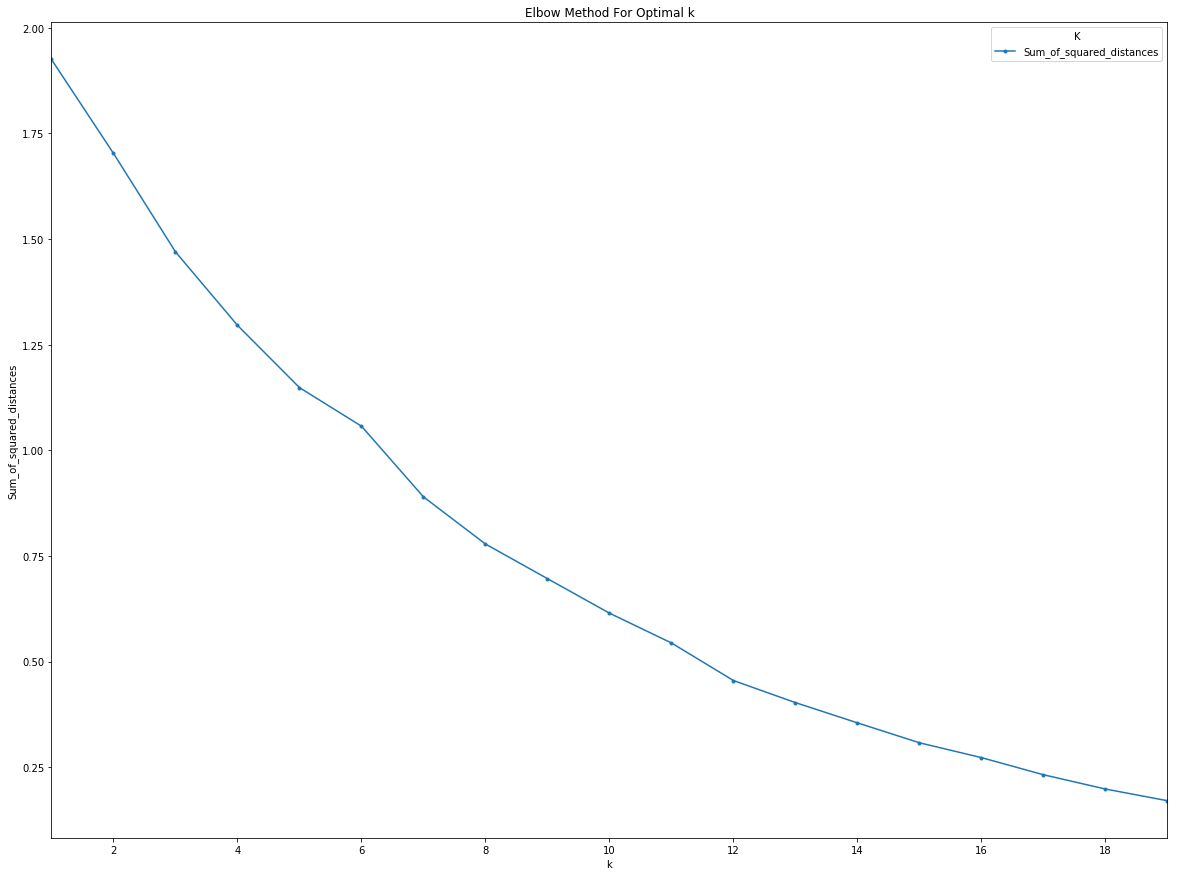

In [43]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index=K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
# optimal_k
optimal_k.plot(kind = 'line', figsize = (20, 15), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

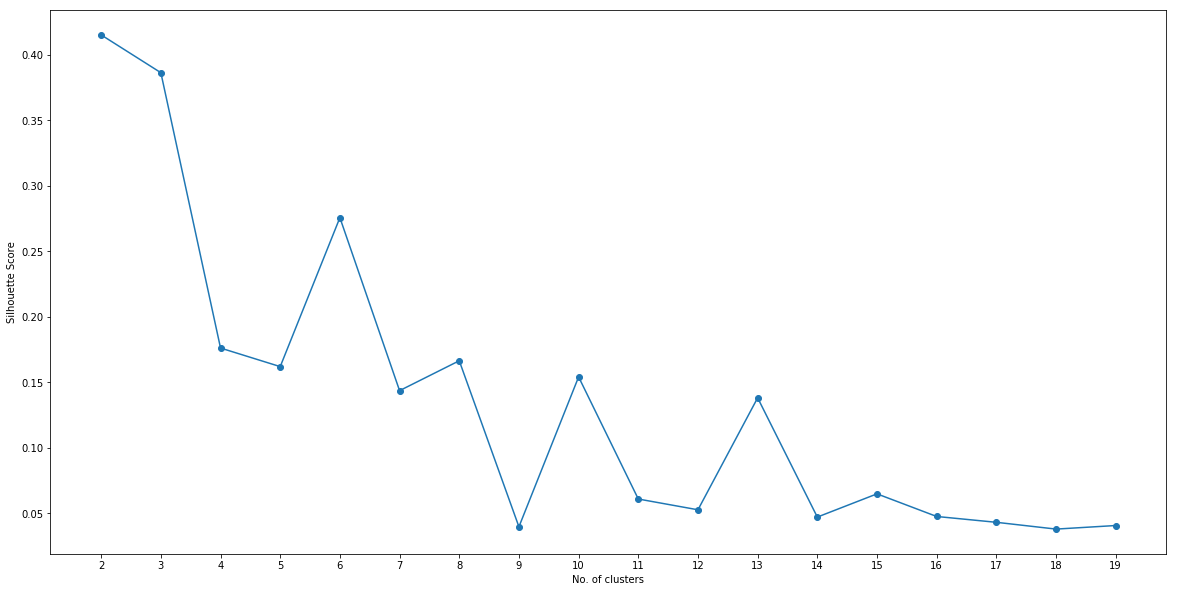

In [44]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 20

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = london_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [45]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 3], dtype=int32)

## Segment the Boroughs by Asian population , Working Hours & Earning/hour  and most common venues


In [46]:
london_info =pd.DataFrame(zip(london_table_coordinates['Borough'],asian_london_table['Asian'] , london_working_hours['Working Hours%'] ,  london_table_earning[2019]))
london_info.columns=['Borough','Asian Population' , 'Working Hours per week', 'Earnings per hour']

In [47]:
london_merged = london_info.merge(neighborhoods_venues_sorted, how='inner', left_on='Borough', right_on='Borough')
london_merged['Cluster Labels'] = kmeans.labels_
london_merged

,Borough,Asian Population,Working Hours per week,Earnings per hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Barking and Dagenham,54000.0,42.00,15.09,Grocery Store,Convenience Store,Bus Stop,Pub,Gym / Fitness Center,Martial Arts Dojo,Park,Supermarket,Gas Station,Liquor Store,1
1,Barnet,57000.0,48.10,17.73,Coffee Shop,Pub,Grocery Store,Restaurant,Fast Food Restaurant,Bookstore,Pharmacy,Italian Restaurant,Pizza Place,Soccer Stadium,0
2,Bexley,17000.0,47.20,16.97,Pub,Italian Restaurant,Fast Food Restaurant,Greek Restaurant,Hotel,Lawyer,Zoo,Flea Market,Fish & Chips Shop,Fish Market,0
3,Brent,107000.0,45.80,15.67,Indian Restaurant,Rugby Pitch,Farm,Bar,Park,Grocery Store,Restaurant,Food Court,Food & Drink Shop,Food Truck,1
4,Bromley,15000.0,36.50,20.90,Pub,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Supermarket,Burger Joint,Indian Restaurant,Gastropub,0
5,Camden,39000.0,42.43,20.99,Bus Stop,Platform,Gym,Café,Soccer Stadium,Soccer Field,Metro Station,Park,Grocery Store,Liquor Store,1
6,Croydon,70000.0,40.50,17.51,Coffee Shop,Pub,Clothing Store,Platform,Park,Bookstore,Hotel,Italian Restaurant,Supermarket,Mediterranean Restaurant,0
7,Ealing,96000.0,47.80,15.66,Coffee Shop,Pub,Hotel,Park,Café,Bakery,Thai Restaurant,Pizza Place,Italian Restaurant,Burger Joint,0
8,Enfield,37000.0,41.20,16.06,Pub,Coffee Shop,Clothing Store,Supermarket,Pharmacy,Park,Sandwich Place,Fish & Chips Shop,Department Store,Indian Restaurant,0
9,Greenwich,39000.0,43.10,17.95,Pub,Grocery Store,Garden,Café,Bar,Park,Pizza Place,Bakery,History Museum,Hotel,0


In [48]:
london_merged[['Latitude', 'Longitude']] = london_table_coordinates[['latitude', 'longitude']]
london_merged['Latitude'] = london_merged['Latitude'].astype(float)
london_merged['Longitude'] = london_merged['Longitude'].astype(float)
london_merged

,Borough,Asian Population,Working Hours per week,Earnings per hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
0,Barking and Dagenham,54000.0,42.00,15.09,Grocery Store,Convenience Store,Bus Stop,Pub,Gym / Fitness Center,Martial Arts Dojo,Park,Supermarket,Gas Station,Liquor Store,1,51.554117,0.150504
1,Barnet,57000.0,48.10,17.73,Coffee Shop,Pub,Grocery Store,Restaurant,Fast Food Restaurant,Bookstore,Pharmacy,Italian Restaurant,Pizza Place,Soccer Stadium,0,51.653090,-0.200226
2,Bexley,17000.0,47.20,16.97,Pub,Italian Restaurant,Fast Food Restaurant,Greek Restaurant,Hotel,Lawyer,Zoo,Flea Market,Fish & Chips Shop,Fish Market,0,51.439900,0.154300
3,Brent,107000.0,45.80,15.67,Indian Restaurant,Rugby Pitch,Farm,Bar,Park,Grocery Store,Restaurant,Food Court,Food & Drink Shop,Food Truck,1,51.567300,0.271100
4,Bromley,15000.0,36.50,20.90,Pub,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Supermarket,Burger Joint,Indian Restaurant,Gastropub,0,51.402805,0.014814
5,Camden,39000.0,42.43,20.99,Bus Stop,Platform,Gym,Café,Soccer Stadium,Soccer Field,Metro Station,Park,Grocery Store,Liquor Store,1,51.551700,0.158800
6,Croydon,70000.0,40.50,17.51,Coffee Shop,Pub,Clothing Store,Platform,Park,Bookstore,Hotel,Italian Restaurant,Supermarket,Mediterranean Restaurant,0,51.371305,-0.101957
7,Ealing,96000.0,47.80,15.66,Coffee Shop,Pub,Hotel,Park,Café,Bakery,Thai Restaurant,Pizza Place,Italian Restaurant,Burger Joint,0,51.512655,-0.305195
8,Enfield,37000.0,41.20,16.06,Pub,Coffee Shop,Clothing Store,Supermarket,Pharmacy,Park,Sandwich Place,Fish & Chips Shop,Department Store,Indian Restaurant,0,51.652085,-0.081018
9,Greenwich,39000.0,43.10,17.95,Pub,Grocery Store,Garden,Café,Bar,Park,Pizza Place,Bakery,History Museum,Hotel,0,51.482084,-0.004542


### Number of Borough belonging to every cluster

In [49]:
london_merged['Cluster Labels'].value_counts()

0    23
1     7
3     1
2     1
Name: Cluster Labels, dtype: int64

## Creating map for each cluster for better visualization¶


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Final analysis of each cluster
Now, examining each cluster.


##### cluster 1

In [51]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Asian Population'], ascending = False)

,Borough,Asian Population,Working Hours per week,Earnings per hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
23,Newham,166000.0,48.9,15.76,Pub,Grocery Store,Gym / Fitness Center,Vietnamese Restaurant,Fish & Chips Shop,Pizza Place,Park,Toy / Game Store,Café,Food Court,0,51.525500,0.035200
24,Redbridge,126000.0,49.5,17.93,Pub,Eastern European Restaurant,Metro Station,Soccer Field,Gym / Fitness Center,Park,English Restaurant,Pizza Place,Golf Course,Hotel,0,51.576320,0.045410
7,Ealing,96000.0,47.8,15.66,Coffee Shop,Pub,Hotel,Park,Café,Bakery,Thai Restaurant,Pizza Place,Italian Restaurant,Burger Joint,0,51.512655,-0.305195
6,Croydon,70000.0,40.5,17.51,Coffee Shop,Pub,Clothing Store,Platform,Park,Bookstore,Hotel,Italian Restaurant,Supermarket,Mediterranean Restaurant,0,51.371305,-0.101957
1,Barnet,57000.0,48.1,17.73,Coffee Shop,Pub,Grocery Store,Restaurant,Fast Food Restaurant,Bookstore,Pharmacy,Italian Restaurant,Pizza Place,Soccer Stadium,0,51.653090,-0.200226
29,Waltham Forest,44000.0,50.5,17.83,Multiplex,Supermarket,Forest,English Restaurant,Train Station,Chinese Restaurant,Fast Food Restaurant,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,0,51.588600,0.011800
9,Greenwich,39000.0,43.1,17.95,Pub,Grocery Store,Garden,Café,Bar,Park,Pizza Place,Bakery,History Museum,Hotel,0,51.482084,-0.004542
8,Enfield,37000.0,41.2,16.06,Pub,Coffee Shop,Clothing Store,Supermarket,Pharmacy,Park,Sandwich Place,Fish & Chips Shop,Department Store,Indian Restaurant,0,51.652085,-0.081018
22,Merton,35000.0,49.7,18.24,Coffee Shop,Grocery Store,Sushi Restaurant,Clothing Store,Fast Food Restaurant,Supermarket,Bar,Pub,Park,Thai Restaurant,0,51.410803,-0.188099
10,Hackney,32000.0,43.7,18.29,Pub,Coffee Shop,Café,Bakery,Brewery,Cocktail Bar,Restaurant,Park,Wine Shop,Vietnamese Restaurant,0,51.543240,-0.049362


In [52]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Asian Population'], ascending = False)

,Borough,Asian Population,Working Hours per week,Earnings per hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
28,Tower Hamlets,128000.0,43.30,20.62,Park,Grocery Store,Café,Convenience Store,Pub,Bed & Breakfast,Business Service,Gas Station,Fish & Chips Shop,Gym / Fitness Center,1,51.520300,0.029300
3,Brent,107000.0,45.80,15.67,Indian Restaurant,Rugby Pitch,Farm,Bar,Park,Grocery Store,Restaurant,Food Court,Food & Drink Shop,Food Truck,1,51.567300,0.271100
15,Hillingdon,100000.0,45.60,15.73,Fast Food Restaurant,Chinese Restaurant,Pub,Grocery Store,Plaza,Construction & Landscaping,Coffee Shop,Park,Forest,Food Truck,1,51.542519,-0.448335
13,Harrow,98000.0,47.60,17.94,Indian Restaurant,Bus Stop,Coffee Shop,Afghan Restaurant,Sandwich Place,Supermarket,Park,Fast Food Restaurant,Thai Restaurant,Grocery Store,1,51.596769,-0.337275
16,Hounslow,86000.0,52.40,16.17,Indian Restaurant,Clothing Store,Coffee Shop,Hotel,Grocery Store,Fast Food Restaurant,Supermarket,Sandwich Place,Discount Store,Pharmacy,1,51.468613,-0.361347
0,Barking and Dagenham,54000.0,42.00,15.09,Grocery Store,Convenience Store,Bus Stop,Pub,Gym / Fitness Center,Martial Arts Dojo,Park,Supermarket,Gas Station,Liquor Store,1,51.554117,0.150504
5,Camden,39000.0,42.43,20.99,Bus Stop,Platform,Gym,Café,Soccer Stadium,Soccer Field,Metro Station,Park,Grocery Store,Liquor Store,1,51.551700,0.158800


In [53]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Asian Population'], ascending = False)

,Borough,Asian Population,Working Hours per week,Earnings per hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
27,Sutton,36000.0,46.3,17.57,Zoo,Park,Train Station,Historic Site,Farmers Market,Fried Chicken Joint,French Restaurant,Forest,Food Truck,Food Court,2,51.3614,0.194


##### Fourth Cluster

In [55]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(1, london_merged.shape[1]))]].sort_values(by = ['Asian Population'], ascending = False)


,Borough,Asian Population,Working Hours per week,Earnings per hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Latitude,Longitude
31,Westminster,33000.0,40.1,20.85,Pub,Mobile Phone Shop,Lake,Soccer Field,Zoo,Farmers Market,Fried Chicken Joint,French Restaurant,Forest,Food Truck,3,51.4975,0.1357


# Conclusions:


#### Observation 


#### We can observe the relativitiy of the asian population , working hours and earnings per borough with the presence of an Asian Restaurant in the top venue list 

#### Our choice based on this would be as follows: 

##### Label 1 Cluster : "Tower Hamlets" , "Hounslow" as Tower Hamlets has a 128000 asian population with 43.3 working hours and one of the heighest earnings per hour 20 .62  and no Asian restaurant to serve this needs as the rest of the cluster Boroughs which we can observe the high presence of Asian restaurants due to high asian population , working hours and earnings. Hounslow Already have an Asian restaurant as a Top Venue due to the 86000 asian population , the highest working hours 52.4 and 16.17 as earnings per hour , opening another Restaurant would be recommended in this Borough.



##### Label 0 Cluster :"Newham" , "Redbridge"as both have 120000>asian population , 45>working hours , 15>earnings per hour and not much asian restaurants to serve this population needs,As less asian population boroughs which have more asian restaurants and less population to serve with the same working hours and earnings range.

##### We will choose the Label 1 , 0 Cluster choice “Tower Hamlets ,  Redbridge“ .
